In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:\\Users\\Yash\\jupyter\\Data Mining\\Homework1\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\Yash\jupyter\Data Mining\Homework1\CSE 572 Homework1.pdf
C:\Users\Yash\jupyter\Data Mining\Homework1\dm-hw2.ipynb
C:\Users\Yash\jupyter\Data Mining\Homework1\gender_submission.csv
C:\Users\Yash\jupyter\Data Mining\Homework1\Homework1.ipynb
C:\Users\Yash\jupyter\Data Mining\Homework1\test.csv
C:\Users\Yash\jupyter\Data Mining\Homework1\titanic-data-science-solutions(reproduced).ipynb
C:\Users\Yash\jupyter\Data Mining\Homework1\train.csv


In [5]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
train_df = pd.read_csv('C:\\Users\\Yash\\jupyter\\Data Mining\\Homework1\\train.csv')
test_df = pd.read_csv('C:\\Users\\Yash\\jupyter\\Data Mining\\Homework1\\test.csv')
combine = [train_df, test_df]

In [10]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [13]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Data pre processing and observations

In [15]:
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


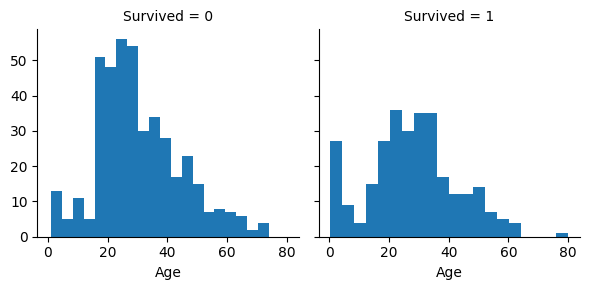

In [19]:
import seaborn as sns
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

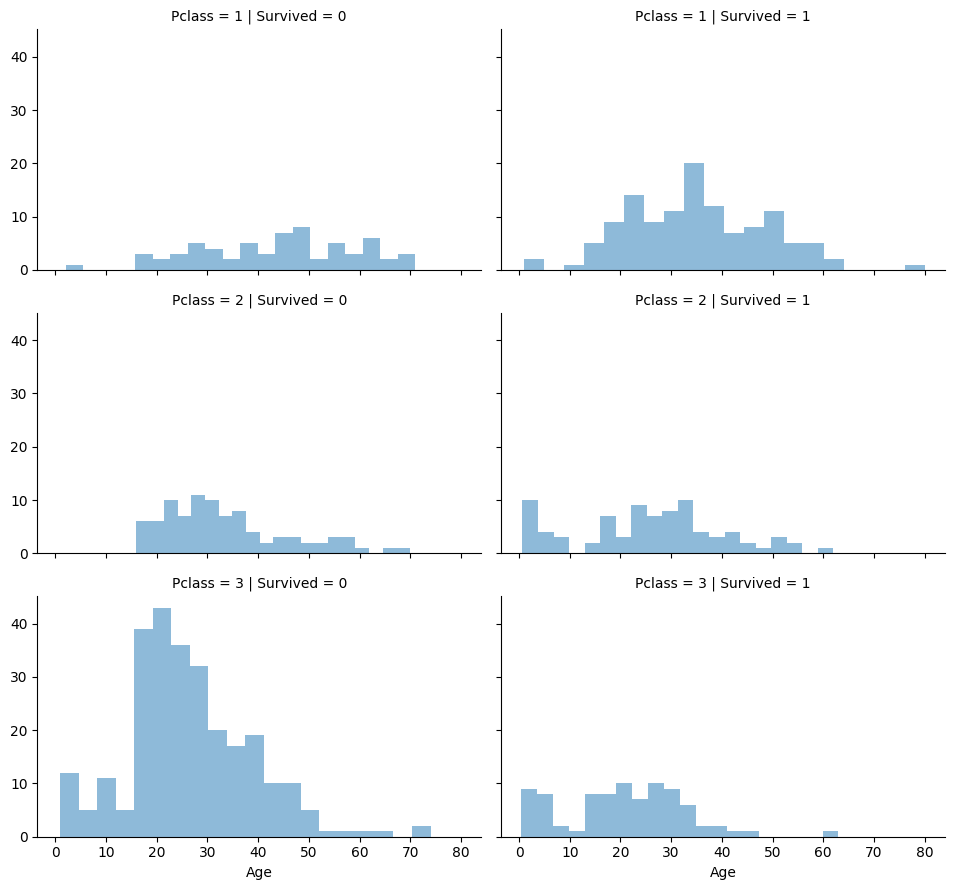

In [20]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\Yash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Yash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


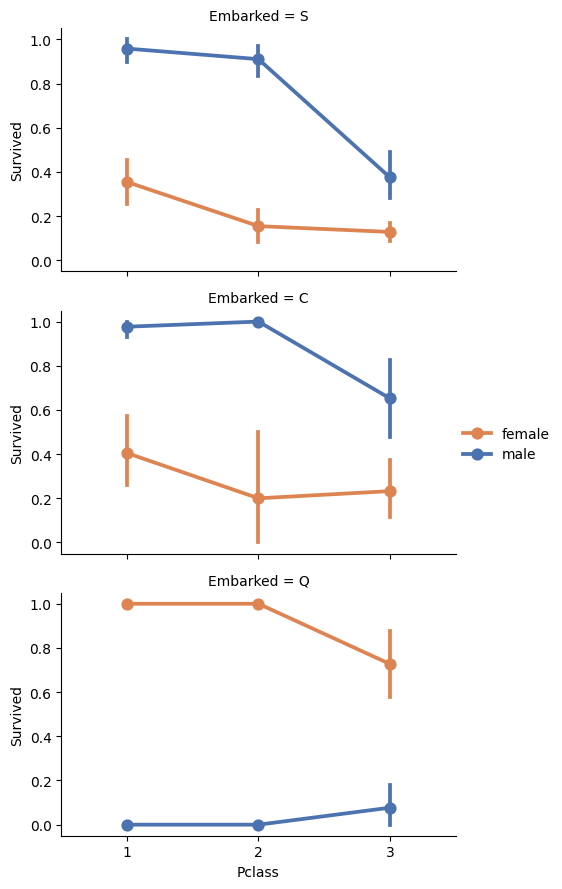

In [21]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\Yash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


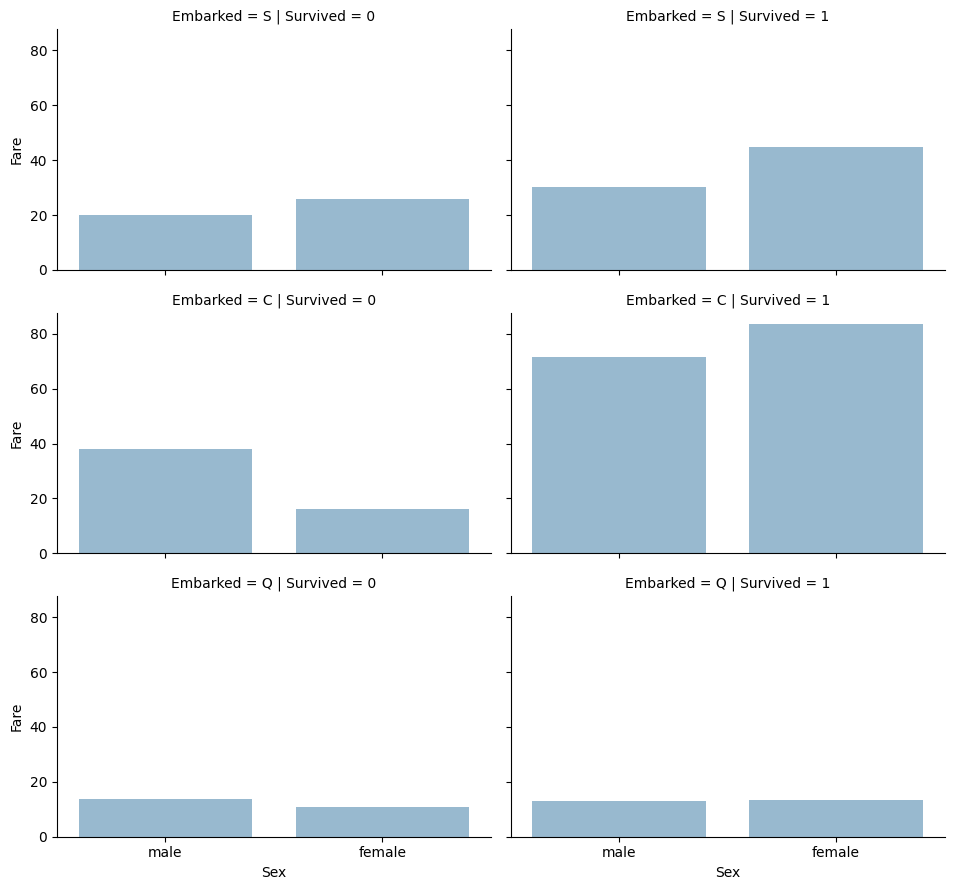

In [22]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None)
grid.add_legend()

C:\Users\Yash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


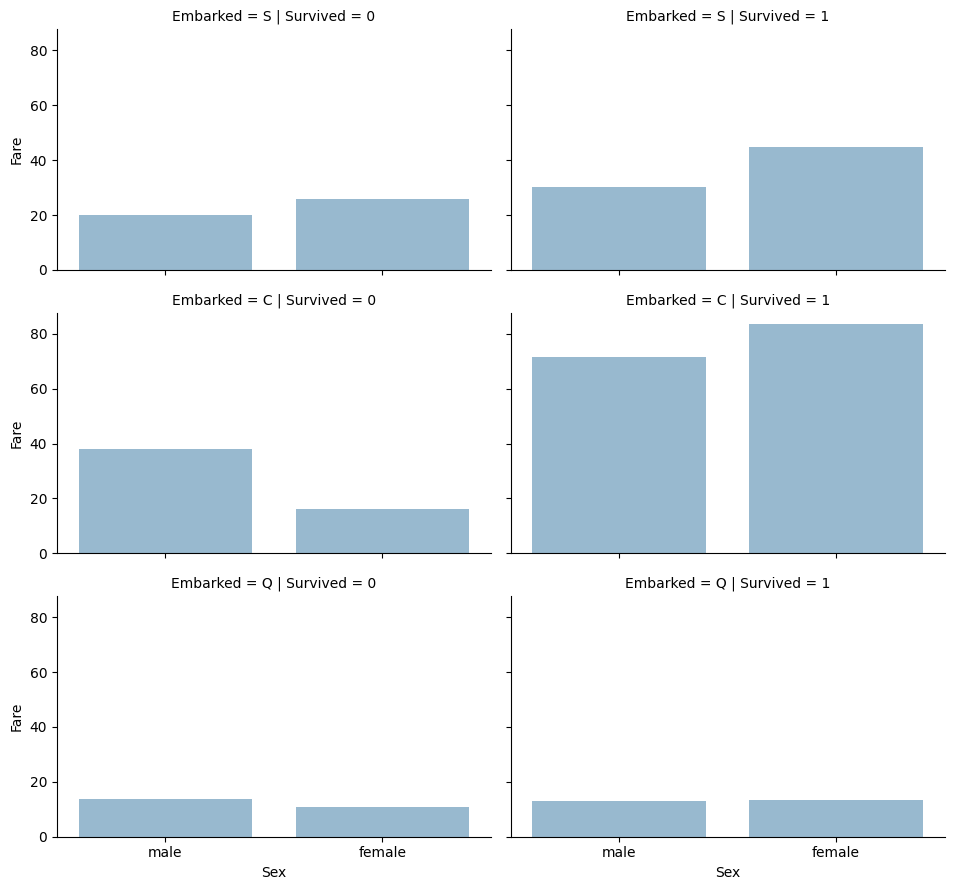

In [23]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived',aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None)
grid.add_legend()

## finalizing the feature sets

In [24]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [25]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## maping title feature

In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [28]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [29]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


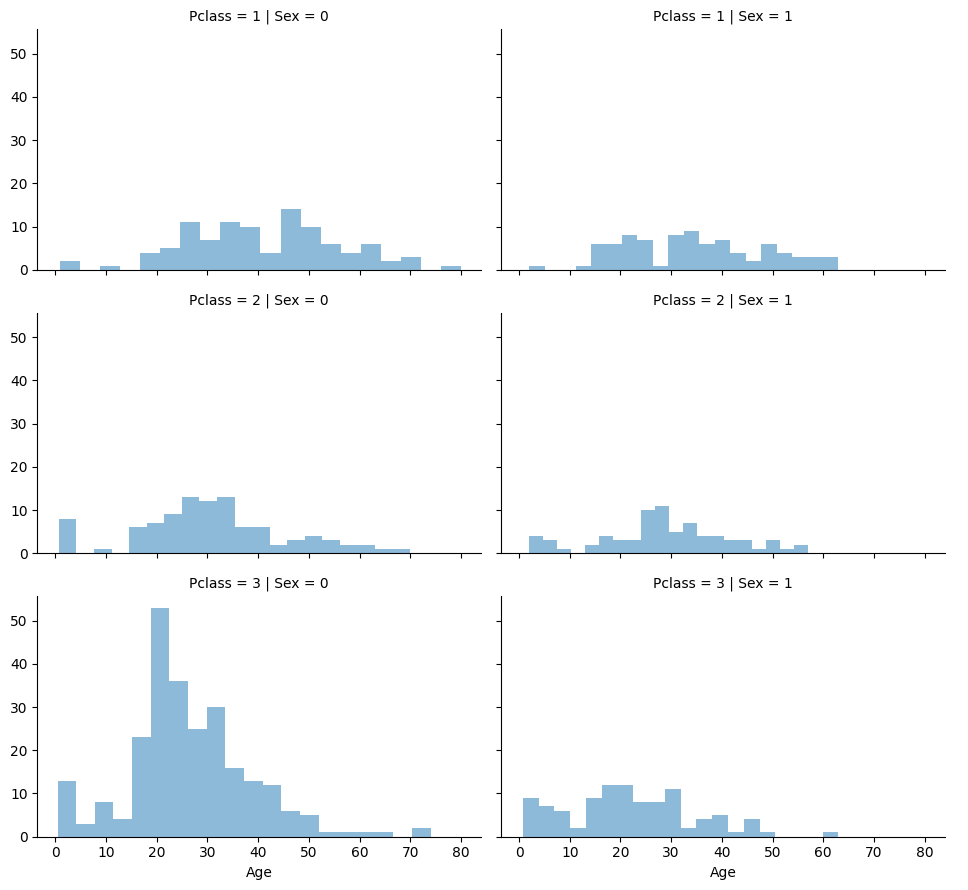

In [24]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

## Age guess and filing

In [30]:
guess_ages = np.zeros((2,3))
guess_ages
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


## Creating Ageband

#### ageband try dividing into 5 age interval (by taking 16 bins), instead of 32

In [31]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 16)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 5.0]",0.704545
1,"(5.0, 10.0]",0.350000
2,"(10.0, 15.0]",0.578947
3,"(15.0, 20.0]",0.340206
4,"(20.0, 25.0]",0.295720
5,"(25.0, 30.0]",0.380165
6,"(30.0, 35.0]",0.526316
7,"(35.0, 40.0]",0.366667
8,"(40.0, 45.0]",0.361702
9,"(45.0, 50.0]",0.432432


In [27]:
for dataset in combine:         
    dataset.loc[ dataset['Age'] <= 5, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 10), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 15), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 35), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 40), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 45), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 50), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 55), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 55) & (dataset['Age'] <= 60), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 65), 'Age'] = 12
    dataset.loc[(dataset['Age'] > 65) & (dataset['Age'] <= 70), 'Age'] = 13
    dataset.loc[(dataset['Age'] > 70) & (dataset['Age'] <= 75), 'Age'] = 14
    dataset.loc[(dataset['Age'] > 75) & (dataset['Age'] <= 80), 'Age'] = 15
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,4,1,0,7.2500,S,1,"(20.0, 25.0]"
1,1,1,1,7,1,0,71.2833,C,3,"(35.0, 40.0]"
2,1,3,1,5,0,0,7.9250,S,2,"(25.0, 30.0]"
3,1,1,1,6,1,0,53.1000,S,3,"(30.0, 35.0]"
4,0,3,0,6,0,0,8.0500,S,1,"(30.0, 35.0]"


In [32]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


## IsAlone creation

In [34]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [35]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22,7.2500,S,1,0
1,1,1,1,38,71.2833,C,3,0
2,1,3,1,26,7.9250,S,2,1
3,1,1,1,35,53.1000,S,3,0
4,0,3,0,35,8.0500,S,1,1


In [36]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,66,22,3
1,38,38,1
2,78,26,3
3,35,35,1
4,105,35,3
5,75,25,3
6,54,54,1
7,6,2,3
8,81,27,3
9,28,14,2


## fill embarked

In [37]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,22,7.2500,0,1,0,66
1,1,1,1,38,71.2833,1,3,0,38
2,1,3,1,26,7.9250,0,2,1,78
3,1,1,1,35,53.1000,0,3,0,35
4,0,3,0,35,8.0500,0,1,1,105


In [39]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,34,7.8292,2,1,1,102
1,893,3,1,47,7.0000,0,3,0,141
2,894,2,0,62,9.6875,2,1,1,124
3,895,3,0,27,8.6625,0,1,1,81
4,896,3,1,22,12.2875,0,3,0,66


#### For Fare also, i divided fares into 16 partitions by qcut.

In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 16)
train_df[['FareBand', 'Survived']].groupby(['FareBand'],  as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.229]",0.142857
1,"(7.229, 7.75]",0.271429
2,"(7.75, 7.854]",0.256410
3,"(7.854, 7.91]",0.113636
4,"(7.91, 8.05]",0.225806
5,"(8.05, 9.841]",0.163265
6,"(9.841, 13.0]",0.425532
7,"(13.0, 14.454]",0.315789
8,"(14.454, 18.0]",0.381818
9,"(18.0, 24.479]",0.490909


In [41]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.229, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.229) & (dataset['Fare'] <= 7.75), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.75) & (dataset['Fare'] <= 7.854), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 7.91), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 8.05), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 8.05) & (dataset['Fare'] <= 9.841), 'Fare'] = 5
    dataset.loc[(dataset['Fare'] > 9.841) & (dataset['Fare'] <= 13.0), 'Fare'] = 6
    dataset.loc[(dataset['Fare'] > 13.0) & (dataset['Fare'] <= 14.454), 'Fare'] = 7
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 18), 'Fare'] = 8
    dataset.loc[(dataset['Fare'] > 18) & (dataset['Fare'] <= 24.479), 'Fare'] = 9
    dataset.loc[(dataset['Fare'] > 24.479) & (dataset['Fare'] <= 26.55), 'Fare'] = 10
    dataset.loc[(dataset['Fare'] > 26.55) & (dataset['Fare'] <= 31.0), 'Fare'] = 11
    dataset.loc[(dataset['Fare'] > 31.0) & (dataset['Fare'] <= 46.9), 'Fare'] = 12
    dataset.loc[(dataset['Fare'] > 46.9) & (dataset['Fare'] <= 69.488), 'Fare'] = 13
    dataset.loc[(dataset['Fare'] > 69.488) & (dataset['Fare'] <= 91.079), 'Fare'] = 14
    dataset.loc[(dataset['Fare'] > 91.079) & (dataset['Fare'] <= 512.329), 'Fare'] = 15
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,22,1,0,1,0,66
1,1,1,1,38,14,1,3,0,38
2,1,3,1,26,4,0,2,1,78
3,1,1,1,35,13,0,3,0,35
4,0,3,0,35,4,0,1,1,105
5,0,3,0,25,5,2,1,1,75
6,0,1,0,54,13,0,1,1,54
7,0,3,0,2,9,0,4,0,6
8,1,3,1,27,6,0,3,0,81
9,1,2,1,14,11,1,3,0,28


In [42]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,34,2,2,1,1,102
1,893,3,1,47,0,0,3,0,141
2,894,2,0,62,5,2,1,1,124
3,895,3,0,27,5,0,1,1,81
4,896,3,1,22,6,0,3,0,66
5,897,3,0,14,5,0,1,1,42
6,898,3,1,30,1,2,2,1,90
7,899,2,0,26,11,0,1,0,52
8,900,3,1,18,1,1,3,1,54
9,901,3,0,21,9,0,1,0,63


## now the model parts

In [43]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [44]:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\Yash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80.92

In [45]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.115849
6,IsAlone,0.470430
5,Title,0.452864
4,Embarked,0.238640
3,Fare,0.020380
7,Age*Class,-0.000150
2,Age,-0.031567
0,Pclass,-1.080144


In [46]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

70.59

In [47]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.09

In [48]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.56

In [49]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

75.2

In [50]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\Yash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


81.14

In [51]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.74

# Ques1

In [52]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.96

## part-2

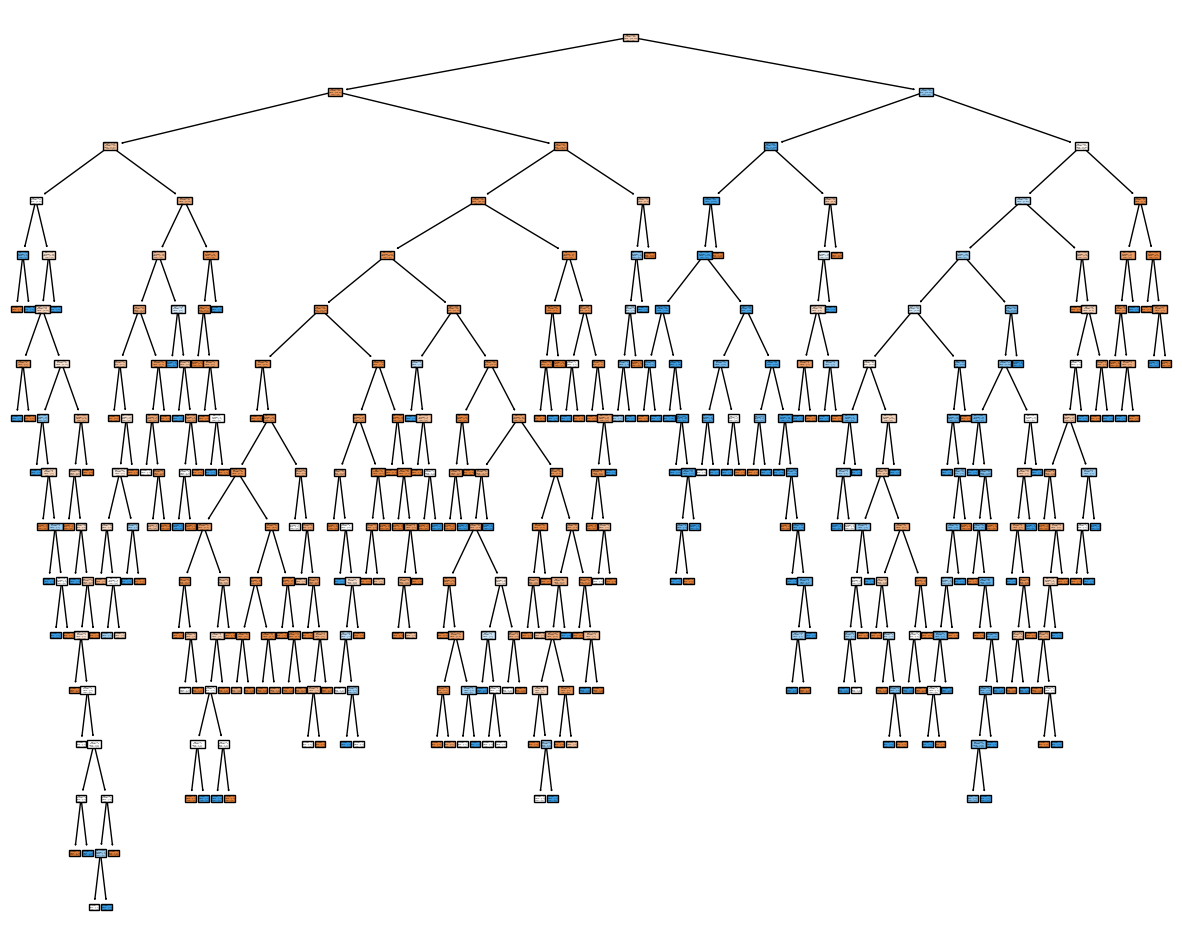

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(15,12))  
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()

## part3

In [54]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# average accuracy 
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.76536313 0.78089888 0.83146067 0.78089888 0.7752809 ]
Mean accuracy: 0.7867804908668634


## Part4

In [55]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.96

In [56]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(random_forest, X_train, Y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# average accuracy 
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.81005587 0.79213483 0.82022472 0.80337079 0.83146067]
Mean accuracy: 0.8114493754315486


In [57]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,95.96
8,Decision Tree,95.96
1,KNN,87.09
7,Linear SVC,81.14
2,Logistic Regression,80.92
4,Naive Bayes,78.56
5,Perceptron,75.20
6,Stochastic Gradient Decent,73.74
0,Support Vector Machines,70.59
